TP DE MACHINE LEARNING !!!

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [168]:
df = pd.read_csv('WineQT.csv')
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.4             0.700         0.00             1.9      0.076  \
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

VISUALISATION DES DONNEES

In [231]:
import numpy as np
import matplotlib.pyplot as plt

d=[df["alcohol"],df["quality"]]
x=[]


xinit=np.transpose(np.matrix(d))
print(xinit)
y=[]
y_simpl=[]

for loop in range(len(xinit)):
    if loop%10==0:
        x.append([xinit[loop,0],xinit[loop,1]])
        #on considère comme bon un vin dont alcohol + qualité^2 > 11+5^2
        if(1.2*xinit[loop,0]+xinit[loop,1]*xinit[loop,1]>11+5*5 ):
            y_simpl.append(1)
        else:
            y_simpl.append(0)
        
        if((1.2*xinit[loop,0]+xinit[loop,1]*xinit[loop,0]>40+5*5 
           and xinit[loop,0]<=12)
           and  xinit[loop,1]>5 ):
            y.append(1)
        else:
            y.append(0)

x=np.array(x)
print(len(x))
print(y) 

[[ 9.4  5. ]
 [ 9.8  5. ]
 [ 9.8  5. ]
 ...
 [10.5  5. ]
 [11.2  6. ]
 [10.2  5. ]]
115
[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0]


In [226]:
def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best' ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos=[]
    neg=[]
    idpos=[]
    idneg=[]
    for loop in range(len(y)):
        if(y[loop]==1):
            idpos.append(X[loop,0])
            pos.append(X[loop,1])
        else:
            idneg.append(X[loop,0])
            neg.append(X[loop,1])

    # Plot examples
    ax.scatter(idpos, pos, marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(idneg, neg, marker='o', s=s, label=neg_label, facecolors='none', edgecolors='blue', lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

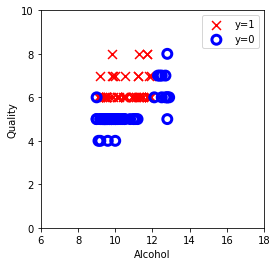

In [277]:


fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(x, y, ax)

ax.axis([6, 18, 0, 10])
ax.set_ylabel('Quality')
ax.set_xlabel('Alcohol')

plt.show()

LOGISTIC REGRESSION


In [172]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1/(1+np.exp(-z))
   
    return g

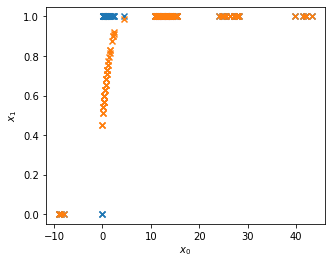

In [233]:
x_plot=[]
for loop in range(len(x)):
    x_plot.append(1.2*x[loop,0]+x[loop,1]*x[loop,1]-(11+5*5))
x_plot=np.asarray(x_plot)
xf=np.copy(x)
for loop in range(len(x)):
    xf[loop,1]=x[loop,1]*x[loop,1]

y_train = y_simpl

w_in = np.array([1.2,1])
                 
b_in = -36

z=np.dot(xf,w_in) +b_in

fig,ax = plt.subplots(1,1,figsize=(5,4))

ax.scatter(x_plot,y_train,marker="x")
ax.scatter(x_plot,sigmoid(z),marker="x")
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()



BOUNDARY

[   0    1    2 ... 1197 1198 1199]


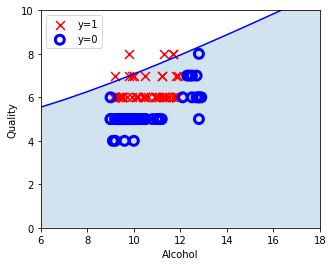

In [278]:
# Choose values between 0 and 6
x0 = np.arange(1200)
print(x0)
import math
#1.2*x[loop,0]+x[loop,1]*x[loop,1]>11+5*5
#ici b=-11+5*5 w0 = 1,2 w1=1
x1 = np.sqrt(20+x0*x0*0.3)
fig,ax = plt.subplots(1,1,figsize=(5,4))
# Plot the decision boundary
ax.plot(x0,x1, c="b")
ax.axis([6, 18, 0, 10])

# Fill the region below the line
ax.fill_between(x0,x1, alpha=0.2)

# Plot the original data
plot_data(x,y,ax)
ax.set_ylabel('Quality')
ax.set_xlabel('Alcohol')
plt.show()

, Logistic Loss

In [275]:
import copy


def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        #cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
        if(y[i]==1):
                cost +=  -np.log(f_wb_i)
        elif(y[i]==0):
                #print(f_wb_i)
                cost +=  -np.log(1-f_wb_i)
             
    cost = cost / m
    return cost


def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw 

def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing 

TEST GRADIENT DESCENT

In [325]:
def map_feature(X1, X2):
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 3
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [326]:
X_train=np.copy(x)
y_train=np.copy(y)
print("Original shape of data:", X_train.shape)
print("Original shape of y:", y_train.shape)
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", X_mapped.shape)
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", X_mapped[0])

np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_logistic(X_mapped, y_train, initial_w, initial_b)

print(" cost :", cost)


Original shape of data: (115, 2)
Original shape of y: (115,)
Shape after feature mapping: (115, 9)
X_train[0]: [9.4 5. ]
mapped X_train[0]: [  9.4     5.     88.36   47.     25.    830.584 441.8   235.    125.   ]
 cost : inf


/tmp/ipykernel_70073/2406840849.py:13: RuntimeWarning: overflow encountered in exp
  g = 1/(1+np.exp(-z))
/tmp/ipykernel_70073/2104443360.py:25: RuntimeWarning: divide by zero encountered in log
  cost +=  -np.log(f_wb_i)


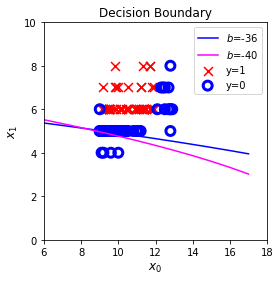

In [327]:
import matplotlib.pyplot as plt

# Choose values between 0 and 6
x0 = np.arange(0,18)

# Plot the two decision boundaries
x1 = np.sqrt(36-x0*1.2)
x1_other = np.sqrt(36-x0*1.65839314)/0.92518989

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c="blue", label="$b$=-36")
ax.plot(x0,x1_other, c="magenta", label="$b$=-40")
ax.axis([6, 18, 0, 10])

# Plot the original data
plot_data(x,y_train,ax)
ax.axis([6, 18, 0, 10])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()




In [328]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_logistic(X_mapped, y_train, initial_w, initial_b)

print(f"dj_db: {dj_db}", )
print(f"First few elements of dj_dw:\n {dj_dw[:4].tolist()}", )

dj_db: -0.45217391304347826
First few elements of dj_dw:
 [-4.77608695652174, -2.860869565217391, -50.83836956521738, -30.260869565217405]


/tmp/ipykernel_70073/2406840849.py:13: RuntimeWarning: overflow encountered in exp
  g = 1/(1+np.exp(-z))


GRADIENT DESCENT APPLICATION

In [302]:
def zscore_normalize_features(X):
    mu     = np.mean(X, axis=0)                 
    sigma  = np.std(X, axis=0)                  
    X_norm = (X - mu) / sigma      
    return (X_norm, mu, sigma)


In [333]:

np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Some gradient descent settings
iterations = 100000
alpha = 0.00003

w,b, J_history = gradient_descent(X_mapped, y_train, initial_w, initial_b, alpha, iterations)

/tmp/ipykernel_70073/2406840849.py:13: RuntimeWarning: overflow encountered in exp
  g = 1/(1+np.exp(-z))
/tmp/ipykernel_70073/2104443360.py:25: RuntimeWarning: divide by zero encountered in log
  cost +=  -np.log(f_wb_i)


Iteration    0: Cost inf   


/tmp/ipykernel_70073/2104443360.py:28: RuntimeWarning: divide by zero encountered in log
  cost +=  -np.log(1-f_wb_i)


Iteration 10000: Cost 0.8727250019694879   
Iteration 20000: Cost 0.6551007342057579   
Iteration 30000: Cost 0.6424527798111161   
Iteration 40000: Cost 0.6589678734793685   
Iteration 50000: Cost 0.6579580022223643   
Iteration 60000: Cost 0.6541773880973601   
Iteration 70000: Cost 0.6505684868977661   
Iteration 80000: Cost 0.6474741347571423   
Iteration 90000: Cost 0.644872192355872   


In [338]:
def sig(z):
 
    return 1/(1+np.exp(-z))
def plot_decision_boundary(w, b, X, y):
    # Credit to dibgerge on Github for this plotting code
    fig,ax = plt.subplots(1, 1, figsize=(4,4))
    plot_data(X[:, 0:2], y,ax)
    
    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        
        ax.plot(plot_x, plot_y, c="b")
        
    else:
        u = np.linspace(7.5, 15, 50)
        print(u)
        v = np.linspace(2, 10, 50)
        
        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sig(np.dot(map_feature(u[i], v[j]), w) + b)
        
        # important to transpose z before calling contour       
        z = z.T
        
        # Plot z = 0.5
        ax.contour(u,v,z, levels = [0.5], colors="g")
    

[ 7.5         7.65306122  7.80612245  7.95918367  8.1122449   8.26530612
  8.41836735  8.57142857  8.7244898   8.87755102  9.03061224  9.18367347
  9.33673469  9.48979592  9.64285714  9.79591837  9.94897959 10.10204082
 10.25510204 10.40816327 10.56122449 10.71428571 10.86734694 11.02040816
 11.17346939 11.32653061 11.47959184 11.63265306 11.78571429 11.93877551
 12.09183673 12.24489796 12.39795918 12.55102041 12.70408163 12.85714286
 13.01020408 13.16326531 13.31632653 13.46938776 13.62244898 13.7755102
 13.92857143 14.08163265 14.23469388 14.3877551  14.54081633 14.69387755
 14.84693878 15.        ]


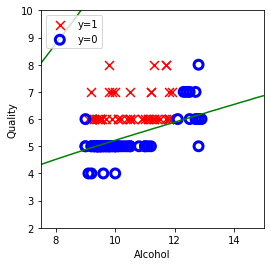

In [339]:
plot_decision_boundary(w, b, X_mapped, y_train)
# Set the y-axis label
plt.ylabel('Quality') 
# Set the x-axis label
plt.xlabel('Alcohol') 
plt.legend(loc="upper left")
plt.show()

PREDICT

In [ ]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    # Loop over each example
    for i in range(m):   
        z_wb = 0
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += X[i,j]*w[j]
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)
        #print(f_wb)
        # Apply the threshold
        if(f_wb>=0.5):
            p[i] = 1.
        else:
            p[i] = 0.
        
    ### END CODE HERE ### 
    return p

In [ ]:

# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

In [ ]:
REGULARIZATION LAMBDA

In [ ]:
def compute_cost_linear_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """

    m  = X.shape[0]
    n  = len(w)
    cost = 0.
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b                                   #(n,)(n,)=scalar, see np.dot
        cost = cost + (f_wb_i - y[i])**2                               #scalar             
    cost = cost / (2 * m)                                              #scalar  
 
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar
    
    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

In [ ]:
np.random.seed(1)
X_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_linear_reg(X_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print("Regularized cost:", cost_tmp)